In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

In [8]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

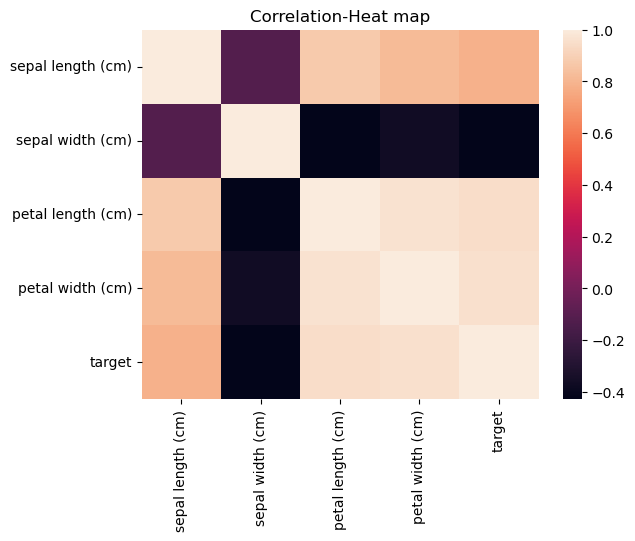

In [21]:

sns.heatmap(df.corr(),color='Blue')
plt.title('Correlation-Heat map')
plt.show()

In [29]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

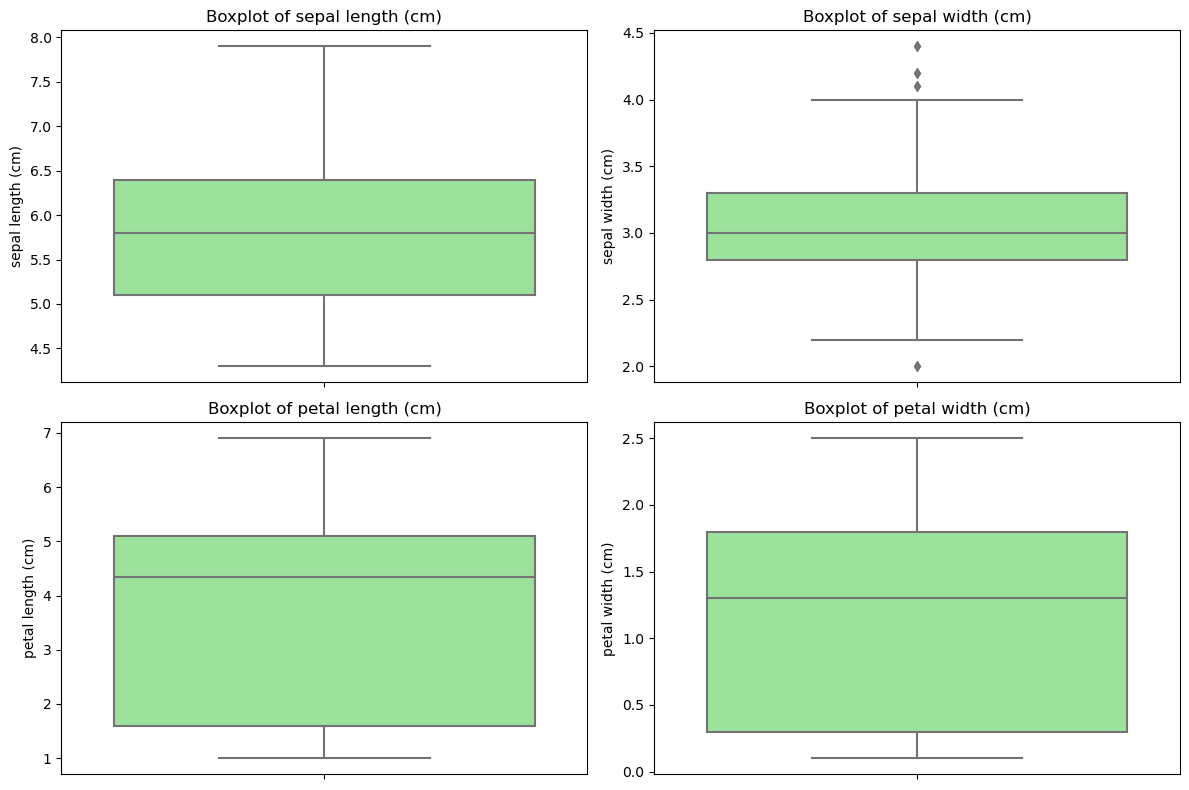

In [41]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

C:\Users\Shaikh Irfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaikh Irfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaikh Irfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaikh Irfan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

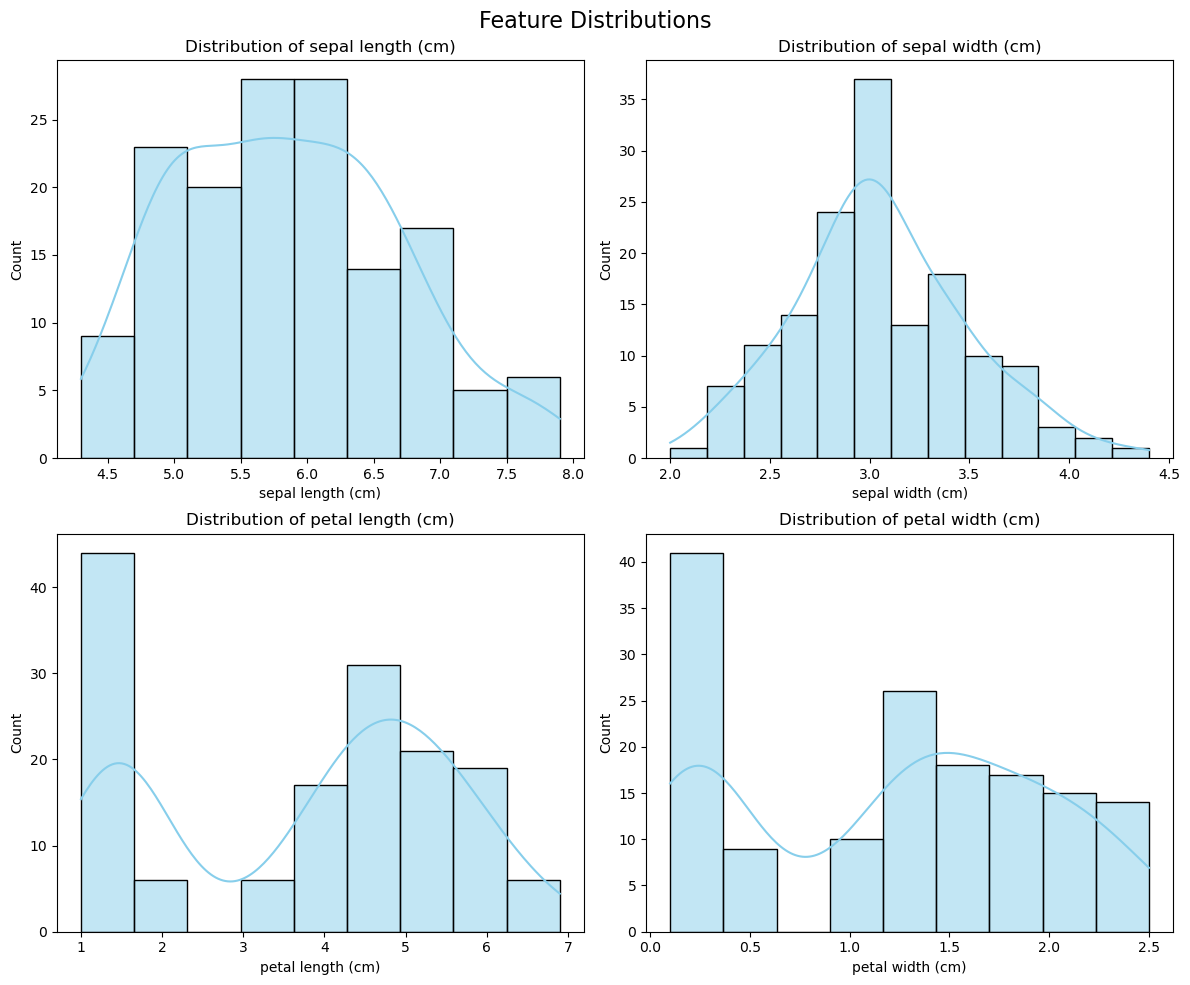

In [43]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.suptitle('Feature Distributions', fontsize=16)
plt.subplots_adjust(top=0.93)
# plt.savefig('results/feature_distributions.png')
plt.show()

In [45]:
X = df.drop('target',axis=1)
y = df['target']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [68]:
svm = SVC()

In [69]:
params = {'C':[0.1,1,5],'kernel':['linear','rbf']}

In [70]:
grid_search = GridSearchCV(svm,params,cv=5)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5], 'kernel': ['linear', 'rbf']})

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5], 'kernel': ['linear', 'rbf']})

In [79]:
best_model = grid_search.best_estimator_

In [80]:
y_pred = grid_search.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [82]:
import joblib

In [83]:
joblib.dump(best_model,'Model.pkl')

['Model.pkl']

In [85]:
load_model = joblib.load('Model.pkl')
y_pred = load_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9666666666666667